# PyTorch Loss Functions
## Implementing Loss Functions in PyTorch

In [1]:
# How to Import Loss Functions in PyTorch
import torch
import torch.nn as nn

# Example loss function imports
mse_loss = nn.MSELoss()  # Mean Squared Error (L2 Loss)
mae_loss = nn.L1Loss()   # Mean Absolute Error (L1 Loss)
ce_loss = nn.CrossEntropyLoss()  # Cross-Entropy Loss

In [2]:
# Calculating MSE Loss in PyTorch
import torch
import torch.nn as nn

# Create sample values
predicted = torch.tensor([2.5, 4.8, 6.9, 9.5])
actual = torch.tensor([3.0, 5.0, 7.0, 9.0])

# Create and use criterion
criterion = nn.MSELoss()
loss = criterion(predicted, actual)

print(f'MSE Loss: {loss}')

# Returns: MSE Loss: 0.13749998807907104

MSE Loss: 0.13749998807907104


In [3]:
# Implementing a Custom Loss Function in PyTorch
import torch
import torch.nn as nn

class CustomLoss(nn.Module):
    def __init__(self, custom_parameters):
        super(CustomLoss, self).__init__()
        self.custom_parameters = custom_parameters

    def forward(self, predictions, targets):
        # Implement your custom loss logic here
        loss = torch.mean((predictions - targets)**2)
        return loss

## Tracking Loss

In [10]:
%config InlineBackend.figure_format='retina'

Epoch [10/15], Loss: 1.5145269632339478


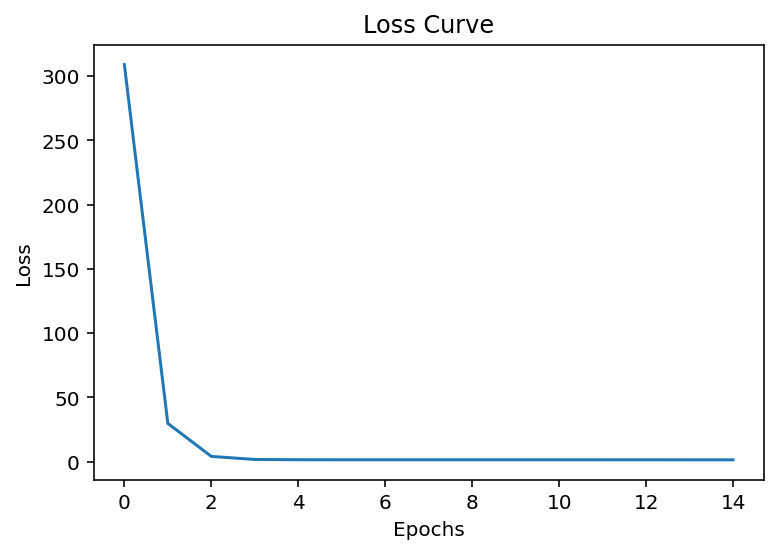

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Sample dataset
X = torch.rand(10000, 1) * 10
y = 2 * X + 1 + torch.randn(10000, 1)

# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop with loss tracking
num_epochs = 15
losses = []

for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)
    
    # Compute the loss
    loss = criterion(predictions, y)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Append the current loss to the list
    losses.append(loss.item())
    
    # Print the loss for every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
